In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
train_csv = "C:/Users/Shruthi/Desktop/classes-students/projects1234/project_2/datasets/train.csv"
train = pd.read_csv(train_csv)

In [3]:
train.columns


Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
df = train[["Overall Qual", "Year Built","Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF", "1st Flr SF","Gr Liv Area","Full Bath","Garage Yr Blt","Garage Cars","Garage Area","Street","Neighborhood",'SalePrice']]

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Neighborhood']=le.fit_transform(df[['Neighborhood']])
df['Street']=le.fit_transform(df[['Street']])

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shruthi\Anaconda3\lib\site-p

In [6]:
df.isnull().sum()

Overall Qual        0
Year Built          0
Year Remod/Add      0
Mas Vnr Area       22
Total Bsmt SF       1
1st Flr SF          0
Gr Liv Area         0
Full Bath           0
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
Street              0
Neighborhood        0
SalePrice           0
dtype: int64

In [7]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(df['Year Built'])

C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.isnull().sum()

Overall Qual       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area      22
Total Bsmt SF      1
1st Flr SF         0
Gr Liv Area        0
Full Bath          0
Garage Yr Blt      0
Garage Cars        1
Garage Area        1
Street             0
Neighborhood       0
SalePrice          0
dtype: int64

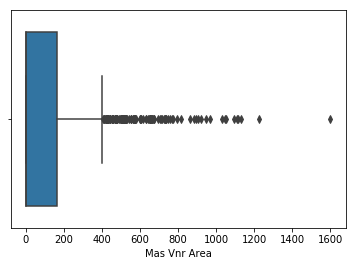

In [9]:
sns.boxplot(df["Mas Vnr Area"])

In [10]:
df = df[df["Mas Vnr Area"]<= 850]

In [11]:
df.isnull().sum()

Overall Qual      0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
Total Bsmt SF     1
1st Flr SF        0
Gr Liv Area       0
Full Bath         0
Garage Yr Blt     0
Garage Cars       1
Garage Area       1
Street            0
Neighborhood      0
SalePrice         0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

Overall Qual      0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
Total Bsmt SF     0
1st Flr SF        0
Gr Liv Area       0
Full Bath         0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
Street            0
Neighborhood      0
SalePrice         0
dtype: int64

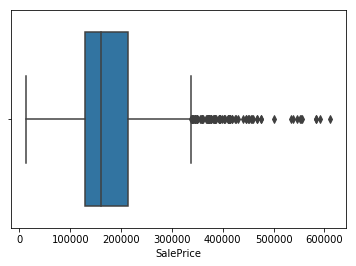

In [14]:
sns.boxplot(df["SalePrice"])

In [15]:
df = df[df["Year Built"]>= 1890]

In [16]:
df = df[df["Overall Qual"]>=2]

In [17]:
df = df[df["Mas Vnr Area"]<=775]

In [18]:
df = df[df["Total Bsmt SF"]<=3000]

In [19]:
df = df[df["Total Bsmt SF"]>=0]

In [20]:
df = df[df["1st Flr SF"]<=2750]

In [21]:
df = df[df["Gr Liv Area"]<=3500]

In [22]:
df = df[df["Garage Yr Blt"]>=1890]

In [23]:
df = df[df["Garage Area"]<=1200]

In [24]:
X = df.drop(columns="SalePrice")
y = df["SalePrice"]


In [25]:
X.dtypes

Overall Qual        int64
Year Built          int64
Year Remod/Add      int64
Mas Vnr Area      float64
Total Bsmt SF     float64
1st Flr SF          int64
Gr Liv Area         int64
Full Bath           int64
Garage Yr Blt     float64
Garage Cars       float64
Garage Area       float64
Street              int32
Neighborhood        int32
dtype: object

In [26]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree)
df_poly = poly.fit_transform(X)

In [27]:
df_poly = pd.DataFrame(df_poly, columns=poly.get_feature_names(df.columns))

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df_poly))
StandardScaler(copy=True, with_mean=True, with_std=True)
standardized_dfpoly = scaler.transform(df_poly)


StandardScaler(copy=True, with_mean=True, with_std=True)


In [29]:
X_train, X_test, y_train, y_test =train_test_split(standardized_dfpoly,y,train_size=0.75,test_size=0.25,random_state=123)

In [30]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("score:",score)
print("cross val score:",cross_val_score(model,X_train,y_train, cv=7).mean())

score: 0.8359491708452009
cross val score: 0.8576599152992277


In [31]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train,y_train)
reg.score(X_test,y_test)

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

0.8906298603341561

In [32]:
test_csv = "C:/Users/Shruthi/Desktop/classes-students/projects1234/project_2/datasets/test.csv"
test = pd.read_csv(test_csv)

In [33]:
test = test[["Overall Qual", "Year Built","Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF", "1st Flr SF","Gr Liv Area","Full Bath","Garage Yr Blt","Garage Cars","Garage Area","Street","Neighborhood"]]

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Neighborhood']=le.fit_transform(test[['Neighborhood']])
test['Street']=le.fit_transform(test[['Street']])

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
test["Garage Yr Blt"] = test["Garage Yr Blt"].fillna(test['Year Built'])

In [36]:
test["Mas Vnr Area"] = test["Mas Vnr Area"].fillna(0)

In [37]:
test.isnull().sum()

Overall Qual      0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
Total Bsmt SF     0
1st Flr SF        0
Gr Liv Area       0
Full Bath         0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
Street            0
Neighborhood      0
dtype: int64

In [38]:

degree = 2
poly = PolynomialFeatures(degree)
test_poly = poly.fit_transform(test)

In [39]:
test_poly = pd.DataFrame(test_poly, columns=poly.get_feature_names(test.columns))

In [40]:
scaler.fit(test_poly)
StandardScaler(copy=True, with_mean=True, with_std=True)
standardized_test_poly = scaler.transform(test_poly)

In [41]:
test_pred = reg.predict(standardized_test_poly)

In [42]:
test_pred = pd.DataFrame(test_pred)

In [43]:
boom_csv = "C:/Users/Shruthi/Desktop/classes-students/projects1234/project_2/datasets/test.csv"
boom = pd.read_csv(boom_csv)

In [44]:
test_pred = test_pred.join(boom["Id"], how='outer')
test_pred = test_pred[['Id', 0]]

In [45]:
test_pred.rename(columns={0:"SalePrice"})

,Id,SalePrice
0,2658,154991.519230
1,2718,191827.722514
2,2414,176521.095973
3,1989,133124.172389
4,625,177510.329269
5,333,116455.353946
6,1327,129335.683684
7,858,156474.328439
8,95,202810.732341
9,1568,157499.881845


In [46]:
test_pred.to_csv('another_model.csv',index=False)